<a href="https://colab.research.google.com/github/lanpty58/mystudy/blob/MLP_Vanishing_Gradient/Gradient_Vanishing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import numpy as np

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

In [ ]:
batch_size = 512
num_epochs = 300
lr = 0.01

In [ ]:
train_dataset = FashionMNIST('./data', train = True, download = True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size, shuffle = True)
test_dataset = FashionMNIST('./data', train = False, download = True, transform = transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size)

100%|██████████| 26421880/26421880 [00:01<00:00, 18102347.86it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 341852.05it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6128398.22it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17028609.62it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Design a MLP module with 7 hidden layer, activation function Sigmoid. This modules is vanishing.

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims, mean, std, activation):
    super(MLP, self).__init__()
    self.layer1 = nn.Linear(input_dims, hidden_dims)
    self.layer2 = nn.Linear(hidden_dims, hidden_dims)
    self.layer3 = nn.Linear(hidden_dims, hidden_dims)
    self.layer4 = nn.Linear(hidden_dims, hidden_dims)
    self.layer5 = nn.Linear(hidden_dims, hidden_dims)
    self.layer6 = nn.Linear(hidden_dims, hidden_dims)
    self.layer7 = nn.Linear(hidden_dims, hidden_dims)
    self.output = nn.Linear(hidden_dims, output_dims)
    self.activation = activation
    for m in self.modules():
      if isinstance(m , nn.Linear):
        nn.init.normal_(m.weight, mean = mean, std = std)
        nn.init.constant_(m.bias, 0.0)

  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.layer1(x)
    x = self.activation(x)
    x = self.layer2(x)
    x = self.activation(x)
    x = self.layer3(x)
    x = self.activation(x)
    x = self.layer4(x)
    x = self.activation(x)
    x = self.layer5(x)
    x = self.activation(x)
    x = self.layer6(x)
    x = self.activation(x)
    x = self.layer7(x)
    x = self.activation(x)
    out = self.output(x)
    return out



In [ ]:
mean = 0.0
std = 0.05
activation = nn.Sigmoid()
model = MLP(input_dims=784, hidden_dims = 128, output_dims=10, mean = mean, std = std, activation = activation).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = lr)

In [ ]:
def train(model, criterion, optimizer):
  train_losses = []
  train_accs = []
  val_losses = []
  val_accs = []
  for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    train_acc = 0
    count = 0
    for X, y in train_loader:
      X, y = X.to(device), y.to(device)
      optimizer.zero_grad()
      predict = model(X)
      loss = criterion(predict, y)
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
      train_acc += (torch.argmax(predict, 1) == y).sum().item()
      count += len(y)
    train_loss /= len(train_loader)
    train_acc /= count
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    val_loss = 0
    val_acc = 0
    count = 0
    with torch.no_grad():
      for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        predict = model(X)
        loss = criterion(predict, y)
        val_loss += loss.item()
        val_acc += (torch.argmax(predict, 1) == y).sum().item()
        count += len(y)
    val_loss /= len(test_loader)
    val_acc /= count
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    print(f'Epoch: {epoch+1}/{num_epochs}, Train Loss :{train_loss : .3f} \t Train Acc:{train_acc: .3f} \t Val Loss: {val_loss: .3f}\t Val Acc: {val_acc: .3f}')
  return train_accs, train_losses, val_accs, val_losses


In [ ]:
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/300, Train Loss : 2.309 	 Train Acc: 0.098 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 2/300, Train Loss : 2.303 	 Train Acc: 0.099 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 3/300, Train Loss : 2.303 	 Train Acc: 0.097 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 4/300, Train Loss : 2.303 	 Train Acc: 0.099 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 5/300, Train Loss : 2.303 	 Train Acc: 0.099 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 6/300, Train Loss : 2.303 	 Train Acc: 0.099 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 7/300, Train Loss : 2.303 	 Train Acc: 0.098 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 8/300, Train Loss : 2.303 	 Train Acc: 0.099 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 9/300, Train Loss : 2.303 	 Train Acc: 0.099 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 10/300, Train Loss : 2.303 	 Train Acc: 0.100 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 11/300, Train Loss : 2.303 	 Train Acc: 0.098 	 Val Loss:  2.303	 Val Acc:  0.100
Epoch: 12/300, Train Loss : 2.

In [ ]:
import matplotlib.pyplot as plt
def plotResult(train_accs, train_losses, val_accs, val_losses):
  figure = plt.figure(figsize=(12, 8))
  plt.subplot(2, 2, 1)
  plt.plot(train_accs, label = 'Train Acc')
  plt.plot(val_accs, label = 'Val Acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)

  plt.subplot(2, 2, 2)
  plt.plot(train_losses, label = 'Train Loss')
  plt.plot(val_losses, label = 'Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss (CrossEntropy)')
  plt.legend()
  plt.grid(True)

  # plt.subplot(2, 2, 3)

  # plt.xlabel('Epoch')
  # plt.ylabel('Accuracy')
  # plt.legend()
  # plt.grid(True)

  # plt.subplot(2, 2, 4)

  # plt.xlabel('Epoch')
  # plt.ylabel('Accuracy')
  # plt.legend()
  # plt.grid(True)

  plt.show()


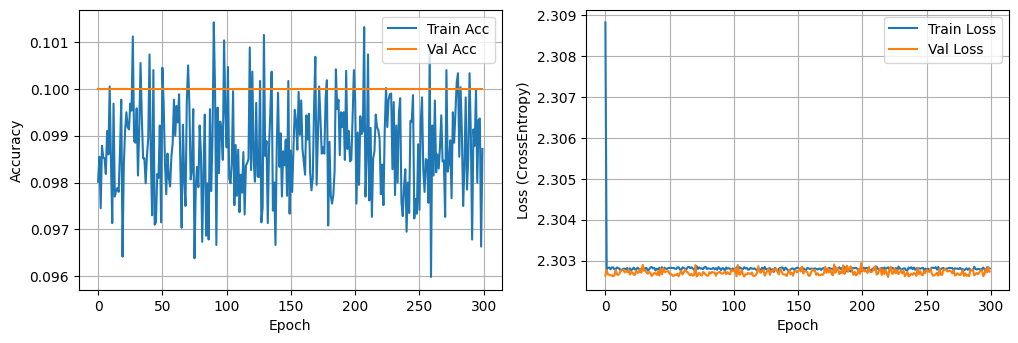

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

# Weight Increasing

In [ ]:
# init std = 10
mean = 0.0
std = 10.0
activation = nn.Sigmoid()
num_epochs = 300
model = MLP(input_dims=784, hidden_dims=128, output_dims=10, mean=mean, std=std, activation=activation).to(device)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/300, Train Loss : 109.534 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 2/300, Train Loss : 109.610 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 3/300, Train Loss : 109.558 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 4/300, Train Loss : 109.581 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 5/300, Train Loss : 109.567 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 6/300, Train Loss : 109.541 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 7/300, Train Loss : 109.494 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 8/300, Train Loss : 109.537 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 9/300, Train Loss : 109.588 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 10/300, Train Loss : 109.607 	 Train Acc: 0.102 	 Val Loss:  109.785	 Val Acc:  0.103
Epoch: 11/300, Train Loss : 109.539 	 Train Acc: 0.102 	 Val Loss:  109.785	 Va

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

NameError: name 'plotResult' is not defined

# Change Activation function.

Better Activation

In [ ]:
# choose Relu instead of Sigmoid function
activation = nn.ReLU()
mean = 0.0
std = 0.05
model = MLP(input_dims=784, hidden_dims=128, output_dims=10, mean=mean, std=std, activation=activation).to(device)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 2/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 3/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 4/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 5/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 6/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 7/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 8/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 9/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 10/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 11/300, Train Loss : 2.303 	 Train Acc: 0.121 	 Val Loss:  2.303	 Val Acc:  0.122
Epoch: 12/300, Train Loss : 2.

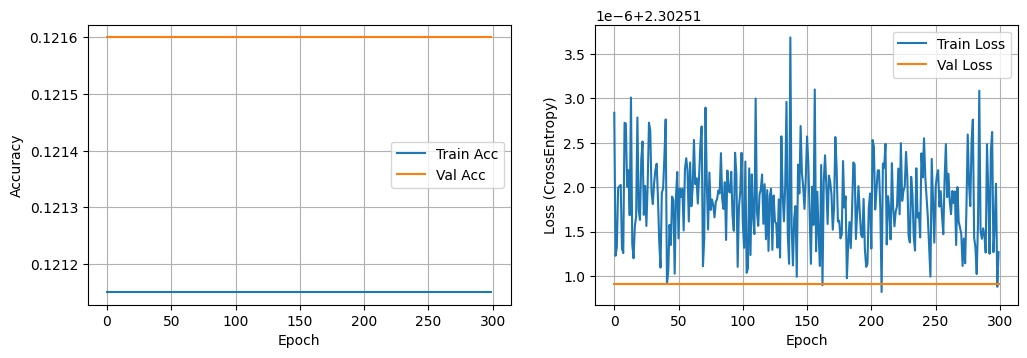

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

# Change Optimizer

In [ ]:
#Using Adam instead of SGD
activation = nn.Sigmoid()
mean = 0.0
std = 0.05
optimizer = optim.Adam(model.parameters(), lr = lr)
model = MLP(input_dims=784, hidden_dims=128, output_dims=10, mean=mean, std=std, activation=activation).to(device)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 2/300, Train Loss : 2.348 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 3/300, Train Loss : 2.348 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 4/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 5/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 6/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 7/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 8/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 9/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 10/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 11/300, Train Loss : 2.347 	 Train Acc: 0.100 	 Val Loss:  2.347	 Val Acc:  2.347
Epoch: 12/300, Train Loss : 2.

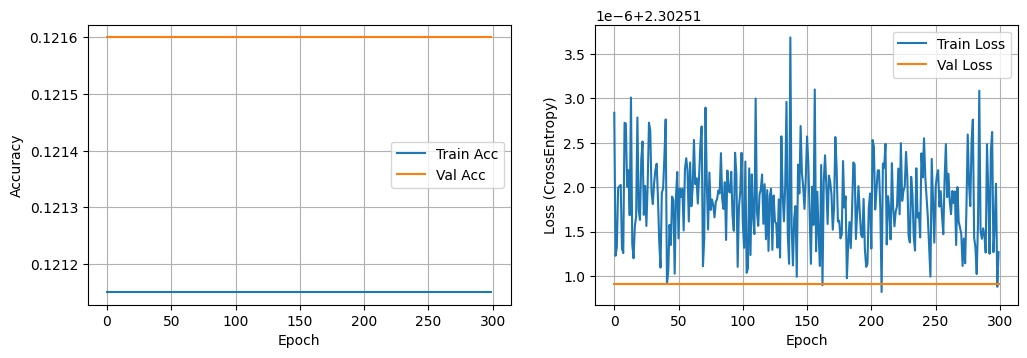

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

# Normalize inside Network

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims, mean, std, activation):
    super(MLP, self).__init__()
    self.layer1 = nn.Linear(input_dims, hidden_dims)
    self.layer2 = nn.Linear(hidden_dims, hidden_dims)
    self.layer3 = nn.Linear(hidden_dims, hidden_dims)
    self.layer4 = nn.Linear(hidden_dims, hidden_dims)
    self.layer5 = nn.Linear(hidden_dims, hidden_dims)
    self.layer6 = nn.Linear(hidden_dims, hidden_dims)
    self.layer7 = nn.Linear(hidden_dims, hidden_dims)
    self.output = nn.Linear(hidden_dims, output_dims)
    self.hidden_dims = hidden_dims
    self.activation = activation
    for m in self.modules():
      if isinstance(m , nn.Linear):
        nn.init.normal_(m.weight, mean = mean, std = std)
        nn.init.constant_(m.bias, 0.0)

  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.layer1(x)
    x = nn.BatchNorm1d(self.hidden_dims)(x)
    x = self.activation(x)
    x = self.layer2(x)
    x = nn.BatchNorm1d(self.hidden_dims)(x)
    x = self.activation(x)
    x = self.layer3(x)
    x = nn.BatchNorm1d(self.hidden_dims)(x)
    x = self.activation(x)
    x = self.layer4(x)
    x = nn.BatchNorm1d(self.hidden_dims)(x)
    x = self.activation(x)
    x = self.layer5(x)
    x = nn.BatchNorm1d(self.hidden_dims)(x)
    x = self.activation(x)
    x = self.layer6(x)
    x = nn.BatchNorm1d(self.hidden_dims)(x)
    x = self.activation(x)
    x = self.layer7(x)
    x = nn.BatchNorm1d(self.hidden_dims)(x)
    x = self.activation(x)
    out = self.output(x)
    return out

In [ ]:
mean = 0.0
std = 0.05
activation = nn.Sigmoid()
model = MLP(input_dims=784, hidden_dims= 128, output_dims=10, mean = mean, std = std, activation = activation).to(device)
criterion = nn.CrossEntropyLoss()
optimize = optim.SGD(model.parameters(), lr = lr)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 2/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 3/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 4/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 5/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 6/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 7/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 8/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 9/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 10/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 11/300, Train Loss : 2.339 	 Train Acc: 0.105 	 Val Loss:  2.338	 Val Acc:  2.338
Epoch: 12/300, Train Loss : 2.

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

# Custom Normalize inside Network

In [ ]:
class CustomNormal(nn.Module):
  def __init__(self):
    super().__init__()

  def forward(self, x):
    mean = x.mean()
    std = x.std()
    return (x-mean)/std

class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims, mean, std):
    super(MLP, self).__init__()
    self.layer1 = nn.Linear(input_dims, hidden_dims)
    self.layer2 = nn.Linear(hidden_dims, hidden_dims)
    self.layer3 = nn.Linear(hidden_dims, hidden_dims)
    self.layer4 = nn.Linear(hidden_dims, hidden_dims)
    self.layer5 = nn.Linear(hidden_dims, hidden_dims)
    self.layer6 = nn.Linear(hidden_dims, hidden_dims)
    self.layer7 = nn.Linear(hidden_dims, hidden_dims)
    self.output = nn.Linear(hidden_dims, output_dims)
    for m in self.modules():
      if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean, std)
        nn.init.constant_(m.bias, 0)

  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.layer1(x)
    x = CustomNormal()(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = CustomNormal()(x)
    x = nn.Sigmoid()(x)
    x = self.layer3(x)
    x = CustomNormal()(x)
    x = nn.Sigmoid()(x)
    x = self.layer4(x)
    x = CustomNormal()(x)
    x = nn.Sigmoid()(x)
    x = self.layer5(x)
    x = CustomNormal()(x)
    x = nn.Sigmoid()(x)
    x = self.layer6(x)
    x = CustomNormal()(x)
    x = nn.Sigmoid()(x)
    output = self.layer7(x)
    return output


In [ ]:
mean = 0.0
std = 0.05
model = MLP(input_dims=784, hidden_dims = 128, output_dims = 10, mean = mean, std = std)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = lr)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/300, Train Loss : 3.454 	 Train Acc: 0.093 	 Val Loss:  2.693	 Val Acc:  0.100
Epoch: 2/300, Train Loss : 2.540 	 Train Acc: 0.099 	 Val Loss:  2.452	 Val Acc:  0.100
Epoch: 3/300, Train Loss : 2.417 	 Train Acc: 0.098 	 Val Loss:  2.391	 Val Acc:  0.100
Epoch: 4/300, Train Loss : 2.377 	 Train Acc: 0.101 	 Val Loss:  2.365	 Val Acc:  0.100
Epoch: 5/300, Train Loss : 2.357 	 Train Acc: 0.102 	 Val Loss:  2.350	 Val Acc:  0.099
Epoch: 6/300, Train Loss : 2.345 	 Train Acc: 0.100 	 Val Loss:  2.341	 Val Acc:  0.100
Epoch: 7/300, Train Loss : 2.338 	 Train Acc: 0.101 	 Val Loss:  2.335	 Val Acc:  0.100
Epoch: 8/300, Train Loss : 2.333 	 Train Acc: 0.101 	 Val Loss:  2.330	 Val Acc:  0.100
Epoch: 9/300, Train Loss : 2.329 	 Train Acc: 0.102 	 Val Loss:  2.327	 Val Acc:  0.100
Epoch: 10/300, Train Loss : 2.326 	 Train Acc: 0.102 	 Val Loss:  2.324	 Val Acc:  0.100
Epoch: 11/300, Train Loss : 2.323 	 Train Acc: 0.102 	 Val Loss:  2.322	 Val Acc:  0.100
Epoch: 12/300, Train Loss : 2.

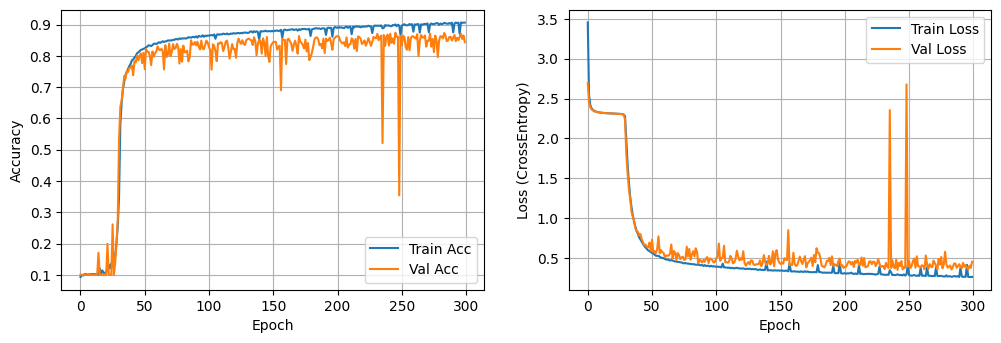

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

# Skip Connection

In [ ]:
class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims, mean, std):
    super(MLP, self).__init__()
    self.layer1 = nn.Linear(input_dims, hidden_dims)
    self.layer2 = nn.Linear(hidden_dims, hidden_dims)
    self.layer3 = nn.Linear(hidden_dims, hidden_dims)
    self.layer4 = nn.Linear(hidden_dims, hidden_dims)
    self.layer5 = nn.Linear(hidden_dims, hidden_dims)
    self.layer6 = nn.Linear(hidden_dims, hidden_dims)
    self.layer7 = nn.Linear(hidden_dims, hidden_dims)
    self.output = nn.Linear(hidden_dims, output_dims)
    for m in self.modules():
      if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean, std)
        nn.init.constant_(m.bias, 0.0)

  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    skip = x
    x = self.layer2(x)
    x = nn.Sigmoid()(x)
    x = self.layer3(x)
    x = nn.Sigmoid()(x)
    x = x+ skip
    x = self.layer4(x)
    x = nn.Sigmoid()(x)
    skip = x
    x = self.layer5(x)
    x = nn.Sigmoid()(x)
    x = self.layer6(x)
    x = nn.Sigmoid()(x)
    x = self.layer7(x)
    x = nn.Sigmoid()(x)
    x = x + skip
    out = self.output(x)
    return out


In [ ]:
mean = 0
std = 0.05
model = MLP(input_dims = 784, hidden_dims = 128, output_dims = 10, mean = 0, std = 0.05)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = lr)
num_epochs = 100
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/100, Train Loss : 2.305 	 Train Acc: 0.110 	 Val Loss:  2.301	 Val Acc:  0.100
Epoch: 2/100, Train Loss : 2.299 	 Train Acc: 0.118 	 Val Loss:  2.298	 Val Acc:  0.100


KeyboardInterrupt: 

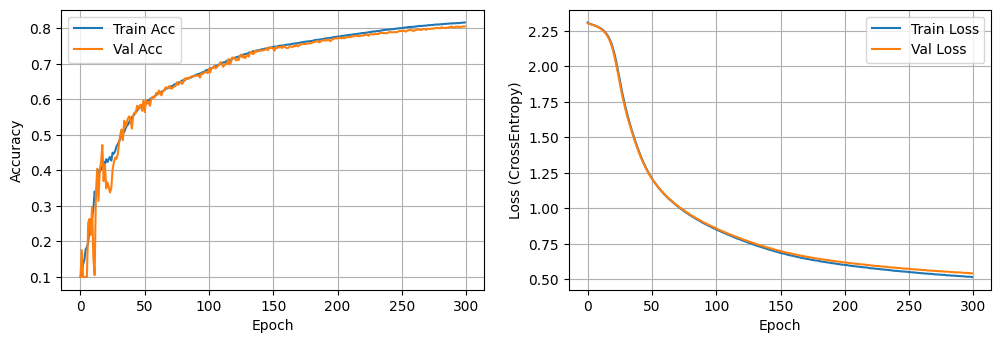

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)


# Train Some Layers

In [ ]:
class MLP_1layer(nn.Module):
  def __init__(self, input_dims, output_dims):
    super(MLP_1layer, self).__init__()
    self.layer1 = nn.Linear(input_dims, output_dims)
    for m in self.modules():
      if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean = 0.0, std = 0.05)
        nn.init.constant_(m.bias, 0.0)

  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    return x

class MLP_2layers(nn.Module):
  def __init__(self, input_dims, output_dims):
    super(MLP_2layers, self).__init__()
    self.layer1 = nn.Linear(input_dims, output_dims)
    self.layer2 = nn.Linear(output_dims, output_dims)
    for m in self.modules():
      if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean = 0, std = 0.05)
        nn.init.constant_(m.bias, 0.0)

  def forward(self, x):
    x = nn.Flatten()(x)
    x = self.layer1(x)
    x = self.layer2(x)
    x = nn.Sigmoid()(x)
    return x

In [ ]:
first = MLP_2layers(input_dims=784, output_dims=128)
second = MLP_2layers(input_dims=128, output_dims=128)
third = MLP_2layers(input_dims = 128, output_dims = 128)
fourth = MLP_1layer(input_dims = 128, output_dims = 128)

Train 1

In [ ]:
model = nn.Sequential(
    first,
    nn.Linear(128, 10)
).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = lr)

In [ ]:
num_epochs = 100
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/100, Train Loss : 0.671 	 Train Acc: 0.759 	 Val Loss:  0.687	 Val Acc:  0.750
Epoch: 2/100, Train Loss : 0.666 	 Train Acc: 0.761 	 Val Loss:  0.682	 Val Acc:  0.753
Epoch: 3/100, Train Loss : 0.660 	 Train Acc: 0.762 	 Val Loss:  0.677	 Val Acc:  0.753
Epoch: 4/100, Train Loss : 0.655 	 Train Acc: 0.763 	 Val Loss:  0.672	 Val Acc:  0.756
Epoch: 5/100, Train Loss : 0.650 	 Train Acc: 0.765 	 Val Loss:  0.667	 Val Acc:  0.755
Epoch: 6/100, Train Loss : 0.646 	 Train Acc: 0.766 	 Val Loss:  0.663	 Val Acc:  0.758
Epoch: 7/100, Train Loss : 0.641 	 Train Acc: 0.768 	 Val Loss:  0.659	 Val Acc:  0.758
Epoch: 8/100, Train Loss : 0.638 	 Train Acc: 0.770 	 Val Loss:  0.655	 Val Acc:  0.761
Epoch: 9/100, Train Loss : 0.632 	 Train Acc: 0.771 	 Val Loss:  0.651	 Val Acc:  0.762
Epoch: 10/100, Train Loss : 0.628 	 Train Acc: 0.772 	 Val Loss:  0.647	 Val Acc:  0.763
Epoch: 11/100, Train Loss : 0.623 	 Train Acc: 0.774 	 Val Loss:  0.643	 Val Acc:  0.765
Epoch: 12/100, Train Loss : 0.

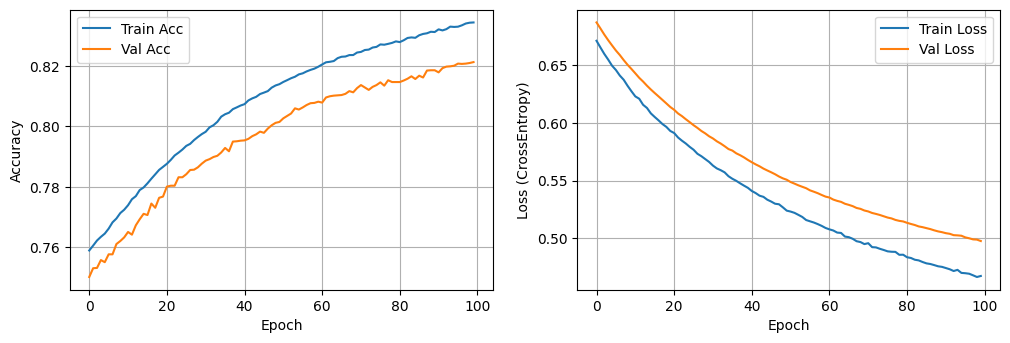

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

Train 2

In [ ]:
for param in first.parameters():
  param.requires_grad = False

model = nn.Sequential(
    first,
    second,
    nn.Linear(128, 10)
).to(device)
num_epochs = 100
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = lr)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)


Epoch: 1/100, Train Loss : 2.290 	 Train Acc: 0.192 	 Val Loss:  2.273	 Val Acc:  0.268
Epoch: 2/100, Train Loss : 2.260 	 Train Acc: 0.422 	 Val Loss:  2.245	 Val Acc:  0.451
Epoch: 3/100, Train Loss : 2.227 	 Train Acc: 0.508 	 Val Loss:  2.207	 Val Acc:  0.531
Epoch: 4/100, Train Loss : 2.180 	 Train Acc: 0.505 	 Val Loss:  2.149	 Val Acc:  0.602
Epoch: 5/100, Train Loss : 2.108 	 Train Acc: 0.553 	 Val Loss:  2.062	 Val Acc:  0.469
Epoch: 6/100, Train Loss : 2.005 	 Train Acc: 0.538 	 Val Loss:  1.944	 Val Acc:  0.488
Epoch: 7/100, Train Loss : 1.878 	 Train Acc: 0.529 	 Val Loss:  1.814	 Val Acc:  0.568
Epoch: 8/100, Train Loss : 1.753 	 Train Acc: 0.557 	 Val Loss:  1.696	 Val Acc:  0.565
Epoch: 9/100, Train Loss : 1.645 	 Train Acc: 0.579 	 Val Loss:  1.598	 Val Acc:  0.570
Epoch: 10/100, Train Loss : 1.552 	 Train Acc: 0.610 	 Val Loss:  1.511	 Val Acc:  0.587
Epoch: 11/100, Train Loss : 1.467 	 Train Acc: 0.632 	 Val Loss:  1.430	 Val Acc:  0.675
Epoch: 12/100, Train Loss : 1.

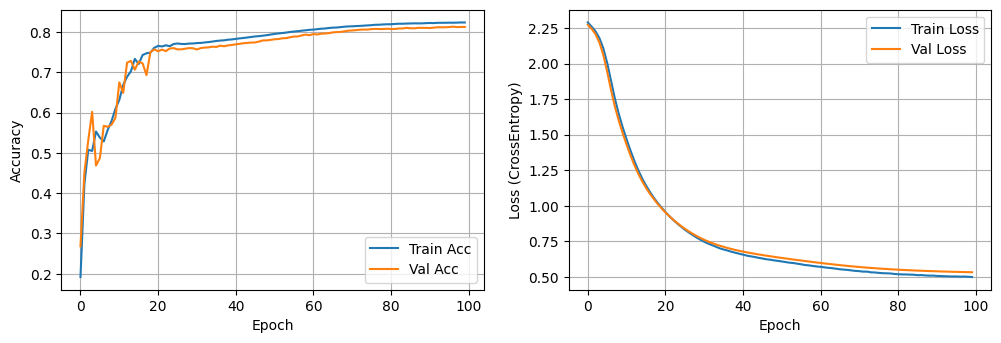

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)


Train 3

In [ ]:
for param in first.parameters():
  param.requires_grad = True

model = nn.Sequential(
    first,
    second,
    third,
    fourth,
    nn.Linear(128, 10)
).to(device)
num_epochs = 100
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = lr)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/100, Train Loss : 2.304 	 Train Acc: 0.102 	 Val Loss:  2.302	 Val Acc:  0.100
Epoch: 2/100, Train Loss : 2.302 	 Train Acc: 0.097 	 Val Loss:  2.301	 Val Acc:  0.100
Epoch: 3/100, Train Loss : 2.301 	 Train Acc: 0.132 	 Val Loss:  2.301	 Val Acc:  0.171
Epoch: 4/100, Train Loss : 2.300 	 Train Acc: 0.136 	 Val Loss:  2.300	 Val Acc:  0.100
Epoch: 5/100, Train Loss : 2.300 	 Train Acc: 0.150 	 Val Loss:  2.299	 Val Acc:  0.100
Epoch: 6/100, Train Loss : 2.299 	 Train Acc: 0.142 	 Val Loss:  2.298	 Val Acc:  0.199
Epoch: 7/100, Train Loss : 2.298 	 Train Acc: 0.178 	 Val Loss:  2.297	 Val Acc:  0.100
Epoch: 8/100, Train Loss : 2.297 	 Train Acc: 0.173 	 Val Loss:  2.297	 Val Acc:  0.100
Epoch: 9/100, Train Loss : 2.296 	 Train Acc: 0.178 	 Val Loss:  2.296	 Val Acc:  0.100
Epoch: 10/100, Train Loss : 2.295 	 Train Acc: 0.195 	 Val Loss:  2.294	 Val Acc:  0.288
Epoch: 11/100, Train Loss : 2.294 	 Train Acc: 0.235 	 Val Loss:  2.293	 Val Acc:  0.278
Epoch: 12/100, Train Loss : 2.

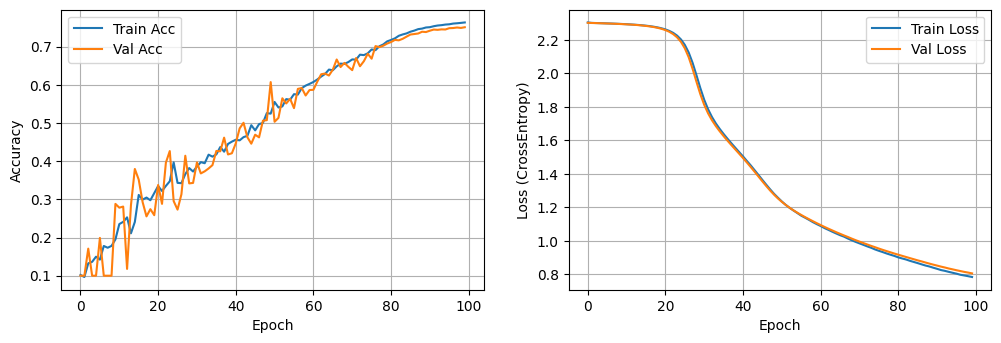

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

Train 4

In [ ]:
for param in first.parameters():
  param.requires_grad = False
for param in second.parameters():
  param.requires_grad = False

model = nn.Sequential(
    first,
    second,
    third,
    nn.Linear(128, 10)
).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = lr)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/100, Train Loss : 1.779 	 Train Acc: 0.494 	 Val Loss:  1.475	 Val Acc:  0.585
Epoch: 2/100, Train Loss : 1.330 	 Train Acc: 0.685 	 Val Loss:  1.230	 Val Acc:  0.737
Epoch: 3/100, Train Loss : 1.154 	 Train Acc: 0.751 	 Val Loss:  1.107	 Val Acc:  0.744
Epoch: 4/100, Train Loss : 1.055 	 Train Acc: 0.757 	 Val Loss:  1.030	 Val Acc:  0.747
Epoch: 5/100, Train Loss : 0.990 	 Train Acc: 0.760 	 Val Loss:  0.976	 Val Acc:  0.750
Epoch: 6/100, Train Loss : 0.940 	 Train Acc: 0.761 	 Val Loss:  0.935	 Val Acc:  0.750
Epoch: 7/100, Train Loss : 0.903 	 Train Acc: 0.761 	 Val Loss:  0.903	 Val Acc:  0.750
Epoch: 8/100, Train Loss : 0.872 	 Train Acc: 0.762 	 Val Loss:  0.877	 Val Acc:  0.751
Epoch: 9/100, Train Loss : 0.848 	 Train Acc: 0.763 	 Val Loss:  0.856	 Val Acc:  0.752
Epoch: 10/100, Train Loss : 0.826 	 Train Acc: 0.763 	 Val Loss:  0.837	 Val Acc:  0.751
Epoch: 11/100, Train Loss : 0.808 	 Train Acc: 0.763 	 Val Loss:  0.821	 Val Acc:  0.751
Epoch: 12/100, Train Loss : 0.

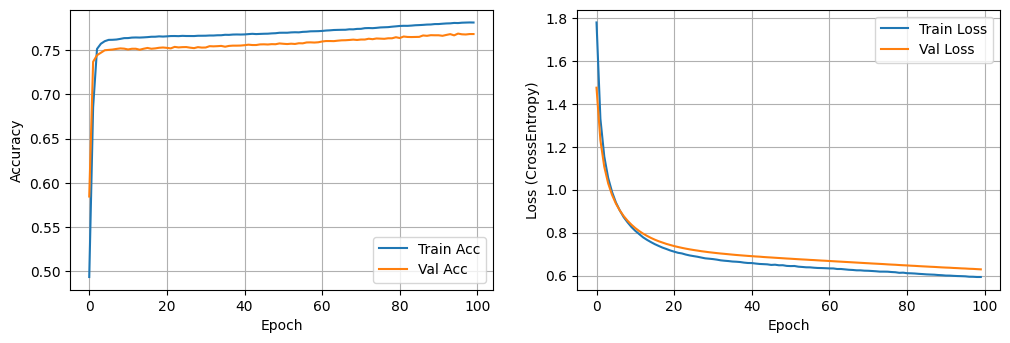

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

Train 5

In [ ]:
for param in first.parameters():
  param.requires_grad = True
for param in second.parameters():
  param.requires_grad = True
model = nn.Sequential(
    first,
    second,
    third,
    nn.Linear(128, 10)
).to(device)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/100, Train Loss : 2.419 	 Train Acc: 0.015 	 Val Loss:  2.381	 Val Acc:  0.070
Epoch: 2/100, Train Loss : 2.346 	 Train Acc: 0.087 	 Val Loss:  2.310	 Val Acc:  0.091
Epoch: 3/100, Train Loss : 2.276 	 Train Acc: 0.093 	 Val Loss:  2.240	 Val Acc:  0.094
Epoch: 4/100, Train Loss : 2.204 	 Train Acc: 0.110 	 Val Loss:  2.169	 Val Acc:  0.133
Epoch: 5/100, Train Loss : 2.137 	 Train Acc: 0.154 	 Val Loss:  2.109	 Val Acc:  0.177
Epoch: 6/100, Train Loss : 2.082 	 Train Acc: 0.206 	 Val Loss:  2.060	 Val Acc:  0.225
Epoch: 7/100, Train Loss : 2.036 	 Train Acc: 0.253 	 Val Loss:  2.017	 Val Acc:  0.277
Epoch: 8/100, Train Loss : 1.996 	 Train Acc: 0.306 	 Val Loss:  1.979	 Val Acc:  0.329
Epoch: 9/100, Train Loss : 1.958 	 Train Acc: 0.377 	 Val Loss:  1.943	 Val Acc:  0.407
Epoch: 10/100, Train Loss : 1.923 	 Train Acc: 0.422 	 Val Loss:  1.910	 Val Acc:  0.424
Epoch: 11/100, Train Loss : 1.892 	 Train Acc: 0.432 	 Val Loss:  1.881	 Val Acc:  0.429
Epoch: 12/100, Train Loss : 1.

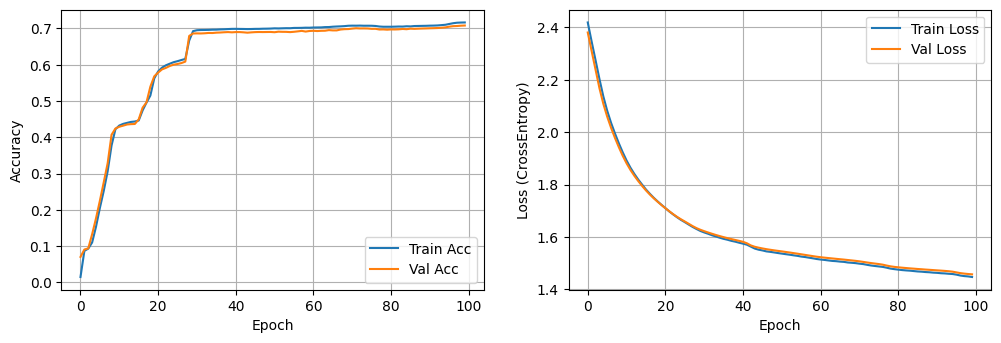

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

Train 6

In [ ]:
for param in first.parameters():
  param.requires_grad = False
for param in second.parameters():
  param.requires_grad = False
for param in third.parameters():
  param.requires_grad = False
model = nn.Sequential(
    first,
    second,
    third,
    fourth,
    nn.Linear(128, 10)
).to(device)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

Epoch: 1/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 2/100, Train Loss : 2.400 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 3/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 4/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 5/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 6/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 7/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 8/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 9/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 10/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 11/100, Train Loss : 2.399 	 Train Acc: 0.038 	 Val Loss:  2.399	 Val Acc:  0.041
Epoch: 12/100, Train Loss : 2.

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)

Train 7

In [ ]:
for param in first.parameters():
  param.requires_grad = True
for param in second.parameters():
  param.requires_grad = True
for param in third.parameters():
  param.requires_grad = True
model = nn.Sequential(
    first,
    second,
    third,
    fourth,
    nn.Linear(128, 10)
).to(device)
train_accs, train_losses, val_accs, val_losses = train(model, criterion, optimizer)

In [ ]:
plotResult(train_accs, train_losses, val_accs, val_losses)